# Lab 1: Revenue Management for Trojan Airlines 

## 1. Executive Summary

For constant pricing policy, in the optimal senario, p = 245, the associated expected profit is 2691.90

For dynamic pricing policy, in the optimal senario, p1 = 240, p2 = 300, the associated expected profit =  3556.0

For capacity rationing policy, in the optimal senario, p1 = 230, p2 = 340, l = 30 , the associated expected profit =  3801.0999999999985

## 2. Generate Customers  

    size_l = int(max(round(sps.norm(200,60).rvs(),0),0))
    size_b = int(max(round(sps.norm(60,20).rvs(),0),0))

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
% matplotlib inline


def generateCustomers():
    customer = []
    size_l = max(int(sps.norm(200,60).rvs()),0)
    size_b = max(int(sps.norm(60,20).rvs()),0)
    # Leisure Customers
    for customer_l in range(size_l):
        time_l = sps.uniform(0,180).rvs()
        value_l = sps.norm(200,80).rvs()
        customer.append([time_l,value_l])      
    
    # Business Customers
    for customer_b in range(size_b):
        time_b = sps.uniform(0,14).rvs()
        value_b = sps.norm(350,120).rvs()
        customer.append([time_b,value_b])
    customer = pd.DataFrame(customer, columns = ['arrival_time','valuation']).sort_values('arrival_time', ascending = False).reset_index(drop = True)
    return customer

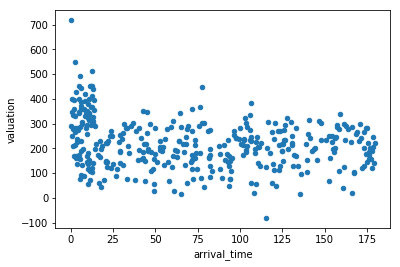

In [2]:
import numpy as np
np.random.seed(0)
generateCustomers().plot(x='arrival_time',y='valuation',kind='scatter')

## Simulating Pricing Policies 

In [3]:
# Constant Pricing
def simulateConstant(customers, seats, p):
    demand = sum(customers.iloc[:,1] >= p)
    sold = min(seats, demand)
    revenue = p * sold
    return revenue

In [4]:
# Dynamic pricing
def simulateDynamic(customers, seats, p1, p2):
    demand1 = sum((customers.iloc[:,0] > 14) & (customers.iloc[:,1] >= p1))
    demand2 = sum((customers.iloc[:,0] <= 14) & (customers.iloc[:,1] >= p2))
    sold1 = min(seats, demand1)
    sold2 = min(seats - sold1, demand2)
    revenue = sold1*p1 + sold2*p2
    return revenue

In [5]:
# Capacity Rationing
def simulateRationing(customers, seats, p1, p2, l):
    index = customers[customers.iloc[:,1] >= p1].reset_index()
    if len(index) <= seats - l:
        revenue = p1 * len(index)
    else: 
        split = index.loc[seats-l,'index']
        demand2 = sum((customers.iloc[split:,1] >= p2))
        sold2 = min(l, demand2)
        revenue = (seats - l)*p1 + sold2*p2
    return revenue

In [6]:
import pandas as pd
data=[[170,50],[150,40],[13,95],[12,100]]
customers=pd.DataFrame(data,columns=['arrival_time','valuation'])
print('Constant policy with 2 seats p=50 \t:',simulateConstant(customers,2,50))
print('Constant policy with 2 seats p=100 \t:',simulateConstant(customers,2,100))
print('Dynamic policy with 3 seats p1=40, p2=95 \t:',simulateDynamic(customers,3,40,95))
print('Dynamic policy with 2 seats p1=40, p2=95 \t:',simulateDynamic(customers,2,40,95))
3
print('Dynamic policy with 1 seats p1=50, p2=100 \t:',simulateDynamic(customers,1,50,100))
print('Rationing policy with 3 seats p1=40, p2=100, l=1 \t:',\
simulateRationing(customers,3,40,100,1))
print('Rationing policy with 2 seats p1=40, p2=100, l=1 \t:',\
simulateRationing(customers,2,40,100,1))
print('Rationing policy with 1 seats p1=40, p2=95, l=1 \t:',\
simulateRationing(customers,1,40,95,1))

Constant policy with 2 seats p=50 	: 100
Constant policy with 2 seats p=100 	: 100
Dynamic policy with 3 seats p1=40, p2=95 	: 175
Dynamic policy with 2 seats p1=40, p2=95 	: 80
Dynamic policy with 1 seats p1=50, p2=100 	: 50
Rationing policy with 3 seats p1=40, p2=100, l=1 	: 180
Rationing policy with 2 seats p1=40, p2=100, l=1 	: 140
Rationing policy with 1 seats p1=40, p2=95, l=1 	: 95


## Optimizing Parameters 

In [7]:
# generate 100 scenarios of customers
customers = []
np.random.seed(0)
for i in range(100):
    customers.append(generateCustomers())

In [8]:
customers

[     arrival_time   valuation
 0      179.633205  222.563546
 1      178.992142  139.124216
 2      178.562024  244.829547
 3      178.262100  205.828559
 4      178.093760  121.384026
 5      177.907291  188.842083
 6      177.388457  158.501275
 7      176.504424  200.637302
 8      176.314847  155.882070
 9      176.151302  185.473394
 10     175.949125  171.820136
 11     175.720619  221.925963
 12     175.125508  144.578354
 13     174.688865  281.017201
 14     174.414907  177.477892
 15     174.233802  283.490367
 16     173.298658  203.412278
 17     173.193938  127.617107
 18     173.082628  265.557329
 19     172.153030  121.947627
 20     171.502498  241.690059
 21     170.794984  297.047008
 22     170.040405  230.154158
 23     169.237744  266.447089
 24     168.158520  257.137906
 25     167.272455  101.552551
 26     167.054633  105.584719
 27     166.022637  287.085834
 28     165.980063   19.899105
 29     165.506870  223.901763
 ..            ...         ...
 343    

In [9]:
# Constant Pricing (multiples of 5)
profit = []
for price in range(0,350,5):
    revenue = pd.Series([simulateConstant(cust, 100, price) for cust in customers])
    profit.append([price, revenue.mean() - 20000])

profit = pd.DataFrame(profit, columns = ['price','profit']).sort_values('profit', ascending = False)
print('Constant pricing policy: best p =', profit.iloc[0,0],', best expected profit = ', profit.iloc[0,1])

Constant pricing policy: best p = 245 , best expected profit =  2897.7000000000007


In [10]:
# Dynamic Pricing (multiples of 100)
pricelist = []
profit = []
for price1 in range(0,700,100):
    for price2 in range(0,700,100):
        if price2 >= price1:
            pricelist.append([price1,price2])
        
for price in pricelist:
    price1, price2 = price
    revenue = pd.Series([simulateDynamic(cust, 100, price1, price2) for cust in customers])
    profit.append([price1, price2, revenue.mean() - 20000])

profit = pd.DataFrame(profit, columns = ['price1','price2','profit']).sort_values('profit', ascending = False)
print('Dynamic pricing policy: best p1 =', profit.iloc[0,0],', best p2 =', profit.iloc[0,1],', best expected profit = ', profit.iloc[0,2])
    

Dynamic pricing policy: best p1 = 200 , best p2 = 300 , best expected profit =  804.0


In [11]:
# Dynamic Pricing (multiples of 20)
pricelist = []
profit = []
for price1 in range(200,400,20):
    for price2 in range(260,400,20):
        if price2 >= price1:
            pricelist.append([price1,price2])
        
        
for price in pricelist:
    price1, price2 = price
    revenue = pd.Series([simulateDynamic(cust, 100, price1, price2) for cust in customers])
    profit.append([price1, price2, revenue.mean() - 20000])

profit = pd.DataFrame(profit, columns = ['price1','price2','profit']).sort_values('profit', ascending = False)
print('Dynamic pricing policy: best p1 =', profit.iloc[0,0],', best p2 =', profit.iloc[0,1],', best expected profit = ', profit.iloc[0,2])
    

Dynamic pricing policy: best p1 = 240 , best p2 = 300 , best expected profit =  3639.4000000000015


In [12]:
# Dynamic Pricing (multiples of 5)
pricelist = []
profit = []
for price1 in range(220,260,5):
    for price2 in range(260,340,5):
        if price2 >= price1:
            pricelist.append([price1,price2])
        
for price in pricelist:
    price1, price2 = price
    revenue = pd.Series([simulateDynamic(cust, 100, price1, price2) for cust in customers])
    profit.append([price1, price2, revenue.mean() - 20000])

profit = pd.DataFrame(profit, columns = ['price1','price2','profit']).sort_values('profit', ascending = False)
print('Dynamic pricing policy: best p1 =', profit.iloc[0,0],', best p2 =', profit.iloc[0,1],', best expected profit = ', profit.iloc[0,2])
    

Dynamic pricing policy: best p1 = 240 , best p2 = 295 , best expected profit =  3647.5999999999985


In [13]:
# Capacity Rationing (multiples of 50, l: multiples of 10)
pricelist = []
profit = []
for price1 in range(200,450,50):
    for price2 in range(200,600,50):
        for l in range (0,100,10):
            if price2 >= price1:
                pricelist.append([price1,price2,l])
        
for price in pricelist:
    price1, price2,l = price
    revenue = pd.Series([simulateRationing(cust, 100, price1, price2, l) for cust in customers])
    profit.append([price1, price2, l, revenue.mean() - 20000])

profit = pd.DataFrame(profit, columns = ['price1','price2','l','profit']).sort_values('profit', ascending = False)
print('Capacity rationing policy: best p1 =', profit.iloc[0,0],', best p2 =', profit.iloc[0,1],\
      ', best l =', profit.iloc[0,2],', best expected profit = ', profit.iloc[0,3])
    

Capacity rationing policy: best p1 = 250 , best p2 = 300 , best l = 40 , best expected profit =  3544.0


In [14]:
# Capacity Rationing (multiples of 20, l: multiples of 5)
pricelist = []
profit = []
for price1 in range(200,300,20):
    for price2 in range(240,400,20):
        for l in range (0,60,5):
            if price2 >= price1:
                pricelist.append([price1,price2,l])
        
for price in pricelist:
    price1, price2,l = price
    revenue = pd.Series([simulateRationing(cust, 100, price1, price2, l) for cust in customers])
    profit.append([price1, price2, l, revenue.mean() - 20000])

profit = pd.DataFrame(profit, columns = ['price1','price2','l','profit']).sort_values('profit', ascending = False)
print('Capacity rationing policy: best p1 =', profit.iloc[0,0],', best p2 =', profit.iloc[0,1],\
      ', best l =', profit.iloc[0,2],', best expected profit = ', profit.iloc[0,3])
    

Capacity rationing policy: best p1 = 220 , best p2 = 340 , best l = 35 , best expected profit =  4004.0


In [15]:
# Capacity Rationing (multiples of 5)
pricelist = []
profit = []
for price1 in range(220,255,5):
    for price2 in range(300,360,5):
        for l in range (25,41):
            if price2 >= price1:
                pricelist.append([price1,price2,l])

for price in pricelist:
    price1, price2,l = price
    revenue = pd.Series([simulateRationing(cust, 100, price1, price2, l) for cust in customers])
    profit.append([price1, price2, l, revenue.mean() - 20000])

profit = pd.DataFrame(profit, columns = ['price1','price2','l','profit']).sort_values('profit', ascending = False)
print('Capacity rationing policy: best p1 =', profit.iloc[0,0],', best p2 =', profit.iloc[0,1],\
      ', best l =', profit.iloc[0,2],', best expected profit = ', profit.iloc[0,3])
    

Capacity rationing policy: best p1 = 230 , best p2 = 330 , best l = 33 , best expected profit =  4159.799999999999
